In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns=None
pd.set_option('display.max_colwidth',800)

In [75]:
df=pd.read_csv('../input/kc-house-data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [76]:
df=df.drop(["id","date", ], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [77]:
#Checking of missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [78]:
df = df.dropna(subset=["sqft_above"])

In [79]:
# Correlation Matrix

corr_matrix = df.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,0.002967,-0.014965,-0.106453,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,0.082775,0.251320,-0.144647,1.000000,0.755924,0.168375,0.446958,0.014412,-0.184842,0.114102,0.198349,0.713197,0.119243


In [80]:
# Feature Selection


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = df.iloc[:,1:]  #independent columns
Y = df.iloc[:,0] #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Features         Score
2     sqft_living  21002.360772
8           grade  17359.011804
9      sqft_above  12512.889029
16  sqft_living15  11264.733778
1       bathrooms   8228.716198
6            view   4050.218305
10  sqft_basement   2531.734429
0        bedrooms   2270.708755
14            lat   2248.709114
5      waterfront   1650.332397


In [81]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat","waterfront" ]]
y = df[["price"]]

In [82]:
# Initialise the Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x = scaler.fit_transform(x)

In [83]:
# Splitting the Data set in training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

In [84]:
#MULTIPLE LINEAR REGRESSION

In [85]:
# Fitting multiple linear regression to the training set 
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
#R-Square value
from sklearn.metrics import r2_score    
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))

Score: 0.6486563096296043


In [86]:
print(regressor.intercept_)
print(regressor.coef_)

[539540.28296384]
[[ 92832.353214    93394.56391284  77130.94915986   2764.01728575
  -12597.60822722  49599.433186    48329.06943799 -22305.5747114
   92428.51505092  55226.58939541]]


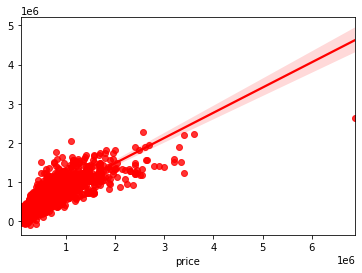

In [87]:
# Original vs Predicted
import seaborn as sns
sns.regplot(y_test, y_pred, color = 'red') 
plt.savefig('mlr.jpg')

In [88]:
#POLYNOMIAL REGRESSION


In [89]:
#fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression()

In [90]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
#R-Square value 
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))

Score: 0.8299003637358217


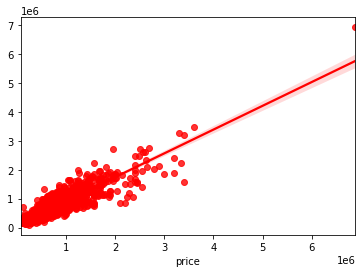

In [91]:
# Original vs Predicted
sns.regplot(y_test,y_pred,color = 'red') 
plt.savefig('pr.jpg')

In [92]:
y_pred_all = lin_reg_2.predict(poly_reg.fit_transform(x))
df["y_pred_all"] = y_pred_all
print(df.iloc[:,[0,-1]])

          price     y_pred_all
0      221900.0  325947.398462
1      538000.0  595518.955896
2      180000.0  276952.667078
3      604000.0  378673.831568
4      510000.0  569655.443232
...         ...            ...
21608  360000.0  499843.980616
21609  400000.0  506821.293818
21610  402101.0  355468.110376
21611  400000.0  436249.948023
21612  325000.0  355152.329370

[21611 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
print ("Coefficient of Determination : ",r2_score(df['price'],y_pred_all))

Coefficient of Determination :  0.8426433000403609


In [94]:
#DECISION TREE REGRESSION

In [110]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(max_depth=10,random_state=0)
regressor_dt.fit(x_train,y_train)
y_pred = regressor_dt.predict(x_test)

#R-Square value 
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))

Score: 0.7166880349500175


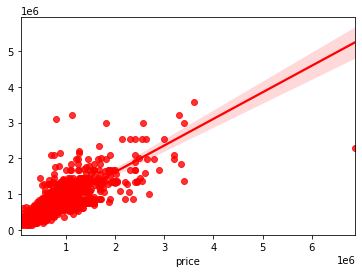

In [96]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red') 
plt.savefig('dtr.jpg')

In [97]:
#RANDOM FOREST REGRESSION

In [111]:
from sklearn.ensemble import RandomForestRegressor

regressor_rfr = RandomForestRegressor(n_estimators = 250,random_state=0)
regressor_rfr.fit(x_train,y_train)
y_pred = regressor_rfr.predict(x_test)

#R-Square value 
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Score: 0.8148145883428144


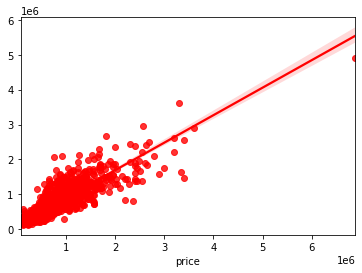

In [99]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red') 
plt.savefig('rfr.jpg')

In [100]:
#K-NEAREST NEIGHBORS REGRESSION

In [101]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN regressor
knn = KNeighborsRegressor(n_neighbors = 50)
# Fit the classifier to the data
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

#R-Square value 
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))

Score: 0.7234590333376416


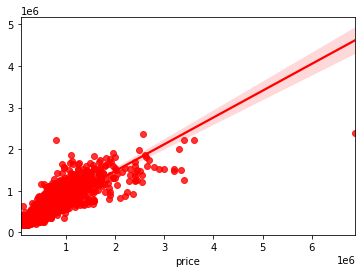

In [102]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red')  
plt.savefig('knnr.jpg')

In [103]:
#SUPPORT VECTOR REGRESSION

In [104]:
#fitting svr to the dataset
from sklearn.svm import SVR
regressor_svr= SVR(kernel="linear")
regressor_svr.fit(x_train,y_train)
y_pred = regressor_svr.predict(x_test)

#R-Square value 
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score: 0.09105772694551195


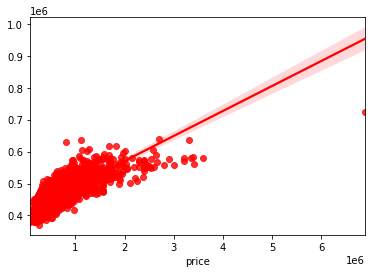

In [105]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red')  
plt.savefig('svr.jpg')

In [106]:
#XGBOOST REGRESSION

In [107]:
from xgboost import XGBRegressor
regressor_xgb=XGBRegressor()
regressor_xgb.fit(x_train,y_train)

y_pred = regressor_xgb.predict(x_test)

#R-Square value 
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))


Score: 0.8125868031622345


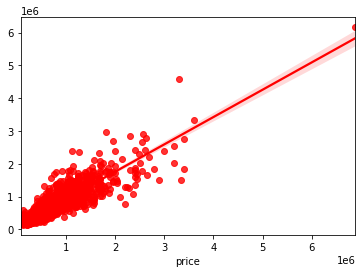

In [108]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red')  
plt.savefig('xgbr.jpg')